In [62]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from pprint import pprint
from config import api_key
from pandleau import *
import seaborn as sns
from scipy import stats
from scipy.stats import linregress

In [17]:
# Build query URL and request your results in Celsius
winedata = []

for x in range (0,31000,1000):
    url = f'https://api.globalwinescore.com/globalwinescores/latest/?&limit=1000&offset={x}'
    query_url = url
    response = requests.get(query_url, headers={'Authorization' : f'Token {api_key}'})
    data = response.json()
    winedata = winedata + data['results']
    print(f'Running rows starting at {x}')
    
winedata

Running rows starting at 0
Running rows starting at 1000
Running rows starting at 2000
Running rows starting at 3000
Running rows starting at 4000
Running rows starting at 5000
Running rows starting at 6000
Running rows starting at 7000
Running rows starting at 8000
Running rows starting at 9000
Running rows starting at 10000
Running rows starting at 11000
Running rows starting at 12000
Running rows starting at 13000
Running rows starting at 14000
Running rows starting at 15000
Running rows starting at 16000
Running rows starting at 17000
Running rows starting at 18000
Running rows starting at 19000
Running rows starting at 20000
Running rows starting at 21000
Running rows starting at 22000
Running rows starting at 23000
Running rows starting at 24000
Running rows starting at 25000
Running rows starting at 26000
Running rows starting at 27000
Running rows starting at 28000
Running rows starting at 29000
Running rows starting at 30000


[{'wine': 'Marchesi Antinori, Badia a Passignano, Chianti Classico Gran Selezione',
  'wine_id': 147377,
  'wine_slug': 'marchesi-antinori-badia-a-passignano-chianti-classico-gran-selezione',
  'appellation': 'Chianti Classico Gran Selezione',
  'appellation_slug': 'chianti-classico-gran-selezione',
  'color': 'Red',
  'wine_type': '',
  'regions': ['Tuscany'],
  'country': 'Italy',
  'classification': None,
  'vintage': '2015',
  'date': '2019-06-15',
  'is_primeurs': False,
  'score': 93.59,
  'confidence_index': 'A+',
  'journalist_count': 5,
  'lwin': None,
  'lwin_11': None},
 {'wine': 'E. Guigal, Chateauneuf Du Pape',
  'wine_id': 68461,
  'wine_slug': 'e-guigal-chateauneuf-du-pape',
  'appellation': 'Chateauneuf Du Pape',
  'appellation_slug': 'chateauneuf-du-pape',
  'color': 'Red',
  'wine_type': '',
  'regions': ['Rhone'],
  'country': 'France',
  'classification': None,
  'vintage': '2015',
  'date': '2019-06-15',
  'is_primeurs': False,
  'score': 90.68,
  'confidence_index

In [45]:
from pandas.io.json import json_normalize

df = pd.DataFrame.from_dict(json_normalize(winedata), orient='columns')

df 

,appellation,appellation_slug,classification,color,confidence_index,country,date,is_primeurs,journalist_count,lwin,lwin_11,regions,score,vintage,wine,wine_id,wine_slug,wine_type
0,Chianti Classico Gran Selezione,chianti-classico-gran-selezione,None,Red,A+,Italy,2019-06-15,False,5,NaN,NaN,[Tuscany],93.59,2015,"Marchesi Antinori, Badia a Passignano, Chianti...",147377,marchesi-antinori-badia-a-passignano-chianti-c...,
1,Chateauneuf Du Pape,chateauneuf-du-pape,None,Red,B+,France,2019-06-15,False,5,1113130.0,1.113130e+10,[Rhone],90.68,2015,"E. Guigal, Chateauneuf Du Pape",68461,e-guigal-chateauneuf-du-pape,
2,Saint Emilion Grand Cru,saint-emilion-grand-cru,None,Red,B+,France,2019-06-15,False,9,NaN,NaN,[Bordeaux],89.85,2016,"Chateau Montlabert, Saint Emilion Grand Cru",39471,chateau-montlabert-saint-emilion-grand-cru,
3,Haut Medoc,haut-medoc,Cru Bourgeois,Red,B,France,2019-06-15,False,7,NaN,NaN,[Bordeaux],89.09,2016,"Chateau Larose Trintaudon, Haut Medoc",38120,chateau-larose-trintaudon-haut-medoc,
4,Puisseguin Saint Emilion,puisseguin-saint-emilion,None,Red,C+,France,2019-06-15,False,3,NaN,NaN,[Bordeaux],88.52,2016,"Vignobles Lannoye, Chateau Lanbersac, Puissegu...",140096,vignobles-lannoye-chateau-lanbersac-puisseguin...,
5,Haut Medoc,haut-medoc,Cru Bourgeois,Red,B+,France,2019-06-15,False,4,NaN,NaN,[Bordeaux],88.48,2016,"Barton & Guestier, Chateau Magnol, Haut Medoc",9295,barton-guestier-chateau-magnol-haut-medoc,
6,Haut Medoc,haut-medoc,Cru Bourgeois,Red,B+,France,2019-06-15,False,7,NaN,NaN,[Bordeaux],88.22,2016,"Chateau De Malleret, Haut Medoc",34545,chateau-de-malleret-haut-medoc,
7,Puisseguin Saint Emilion,puisseguin-saint-emilion,None,Red,B+,France,2019-06-15,False,6,NaN,NaN,[Bordeaux],88.06,2016,"Compagnie Vinicole Edmond De Rothschild, Chate...",35124,compagnie-vinicole-edmond-de-rothschild-chatea...,
8,Bordeaux,bordeaux,None,Red,A,France,2019-06-15,False,11,NaN,NaN,[Bordeaux],87.66,2016,"Chateau Marjosse, Bordeaux",39086,chateau-marjosse-bordeaux,
9,Medoc,medoc,Cru Bourgeois,Red,B+,France,2019-06-15,False,7,NaN,NaN,[Bordeaux],87.47,2016,"Chateau Blaignan, Medoc",32660,chateau-blaignan-medoc,


In [19]:
df_tableau = pandleau(df)

/anaconda3/lib/python3.7/site-packages/pandleau/pandleau.py:68: FutureWarning: A future version of pandas will default to `skipna=True`. To silence this warning, pass `skipna=True|False` explicitly.
  self._column_static_type = self._dataframe.apply(lambda x: pandleau.data_static_type(x), axis = 0)


In [20]:
# Write .tde or .hyper Extract (cannot make it work on tablerau public, but we could make it work in an enterprise environment)
tde = df_tableau.to_tableau('wine.tde', add_index=False)

In [21]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

In [52]:
%%html
<div class='tableauPlaceholder' id='viz1562379051250' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;ProjectSnake-WineDateExploration&#47;WINEDATA&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='ProjectSnake-WineDateExploration&#47;WINEDATA' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Pr&#47;ProjectSnake-WineDateExploration&#47;WINEDATA&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1562379051250');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='1400px';vizElement.style.height='950px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [ ]:
Q: Does the volume of journalist ratings correlate with the rating per wine

In [23]:
style.use('seaborn-poster') #sets the size of the charts
sns.set_context('talk') #sets the size of the fonts (apparently optimal for presenting)
style.use('fivethirtyeight') #sets the style of the charts

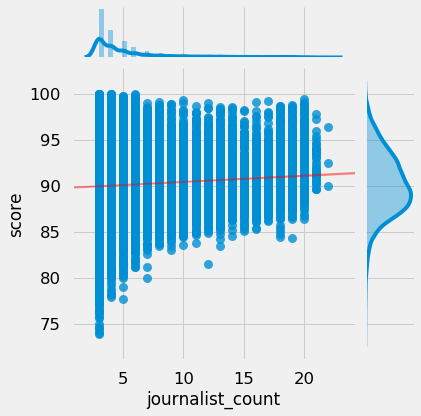

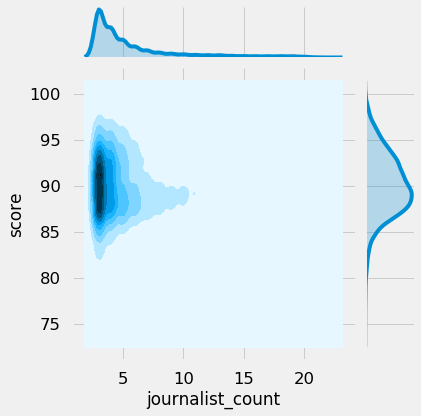

In [24]:
# plotting 2 aggregate views on this distribution
sns.jointplot(x=df["journalist_count"], y=df["score"], kind='reg', line_kws={"color":"r","alpha":0.4,"lw":2})
sns.jointplot(x=df["journalist_count"], y=df["score"], kind='kde')

/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


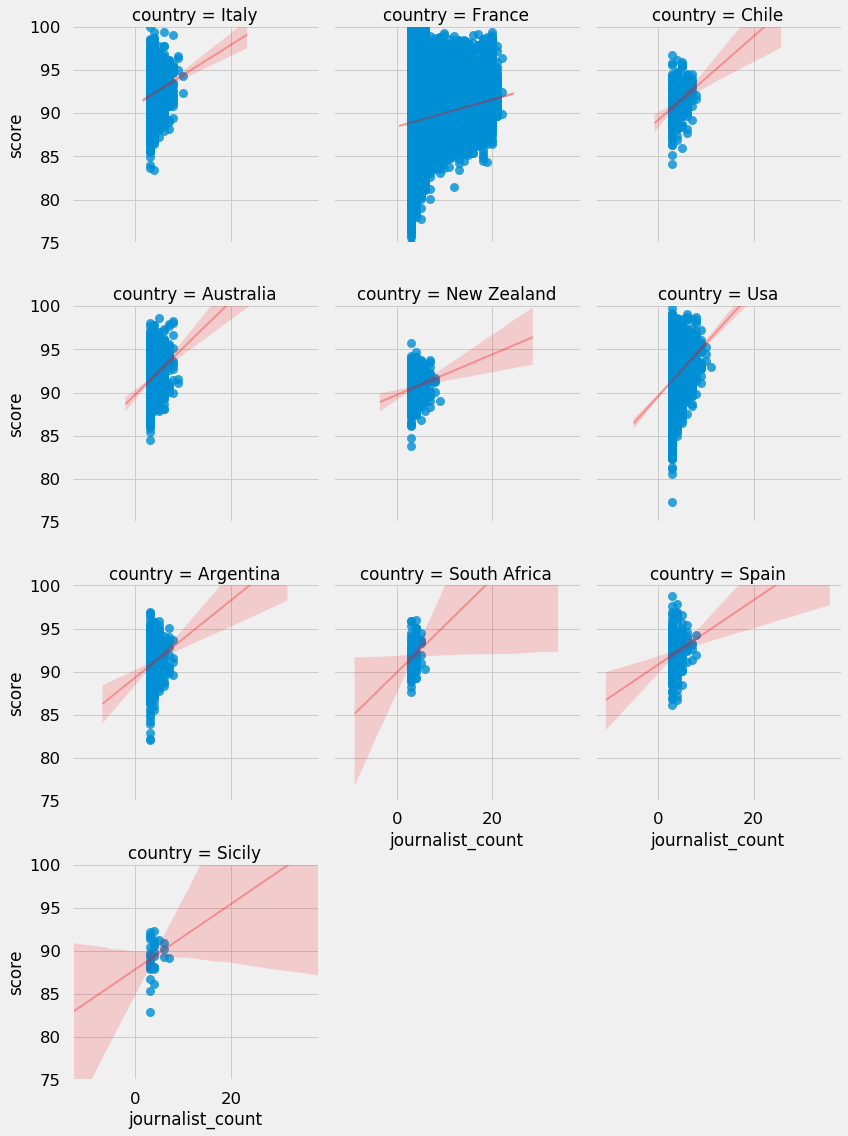

In [29]:
# grouping the first plot by country
g = sns.lmplot(data= df.query("country not in ['Lebanon', 'Germany', 'China']") ,
               x="journalist_count", 
               y="score", 
               col="country", 
               col_wrap=3, 
               size=4, 
             
               line_kws={"color":"r","alpha":0.3,"lw":2})

g.set(ylim=(75,100))

In [46]:
# adding age of wine to the dataset
df['year'] = pd.to_numeric(df['date'].str[:4])
df['vintage'] = pd.to_numeric(df['vintage'].str[:4])
df['age'] = df['year'] - df['vintage']

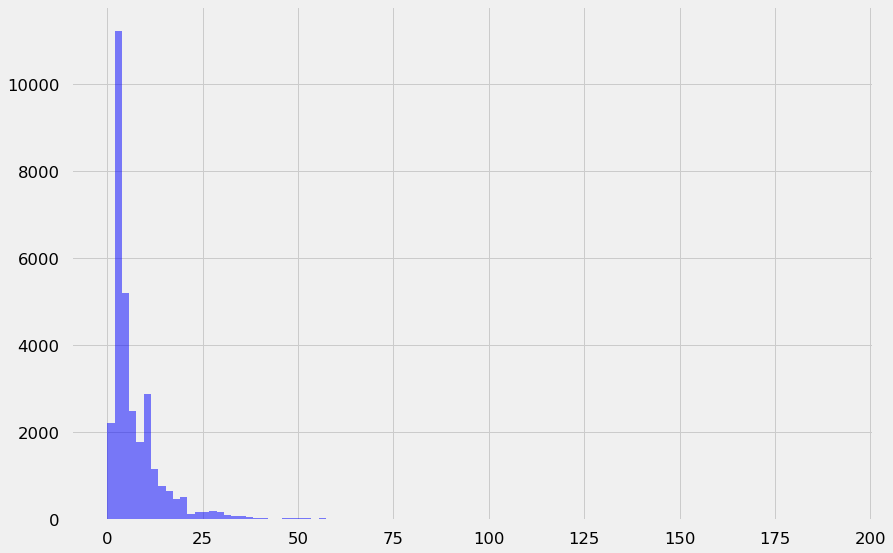

In [47]:
# see the distribution of the ages by the time the wine is being reviewed and rated by the journalist/critic
num_bins = 100
n, bins, patches = plt.hist(df['age'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [48]:
# creating age bins
group_names = ['0 to 1',
               '1 to 2',
               '2 to 3', 
               '3 to 4', 
               '4 to 5', 
               '5 to 7',
               '7 to 10',
               '10 to 15',
               '15 to 25',
               '25 to 50', 
               '50 to 100', 
               '100 to 200']
df['age_bins'] = pd.cut(df['age'], [0, 1, 2, 3, 4, 5, 7, 10, 15, 25, 50, 100, 200], labels=group_names)

# getting average score per age per color of the wine
bestage = df.reset_index().groupby(['age_bins', 'color'], as_index=False)[['score']].mean()
# bestage.head()

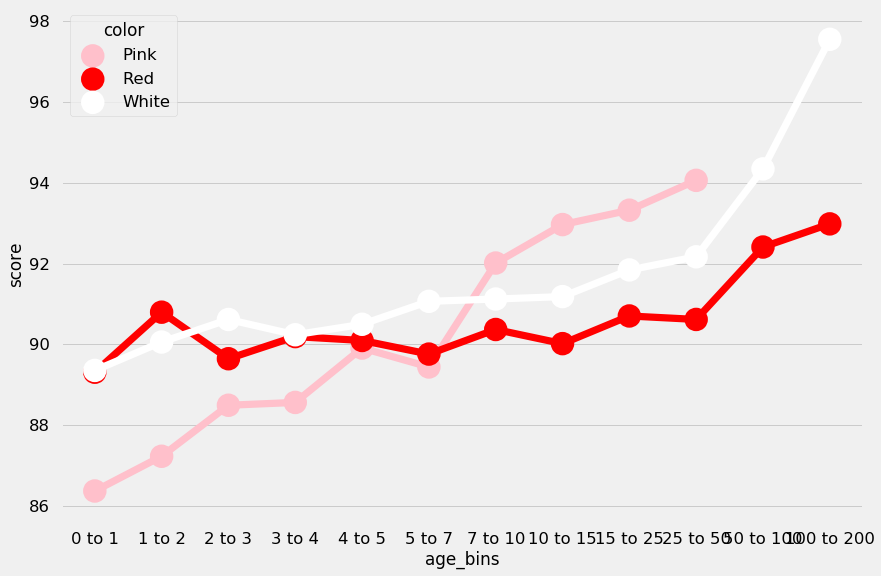

In [49]:
wine_color = ["pink", "red", "white"]
sns.set_palette(wine_color)
# sns.set_style("dark")

sns.pointplot(x="age_bins", y="score", hue="color", kind="point", data=bestage);


# plt.plot( 'score', 'age', data=(a['color'] == 'Pink'), color='skyblue')

In [53]:
#new table with data needed
score_count = df[["journalist_count", "score", "color"]]
score_count.head()

,journalist_count,score,color
0,5,93.59,Red
1,5,90.68,Red
2,9,89.85,Red
3,7,89.09,Red
4,3,88.52,Red


In [54]:
#Convert string to integer in color column
color= {'Red': 1, 'White': 2, 'Pink': 3}
#iterate through color column to convert
score_count.color= [color[item] for item in score_count.color]

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


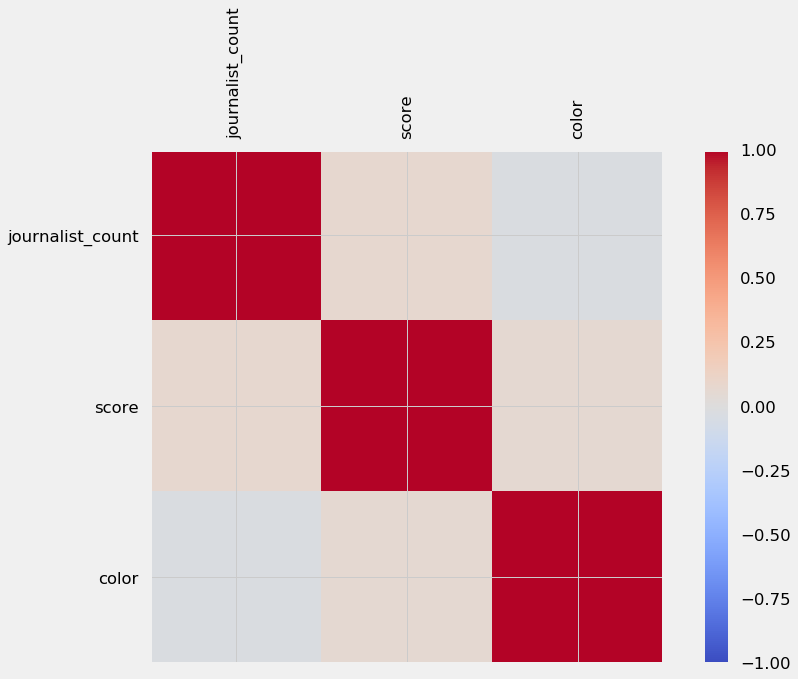

<Figure size 921.6x633.6 with 0 Axes>

In [64]:
#find correlation between variable using corr matrix
corr = score_count.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(score_count.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(score_count.columns)
ax.set_yticklabels(score_count.columns)
plt.show()
plt.savefig("fig1.png")

In [66]:
#Assign columns variable names for plotting
score = score_count.iloc[:, 1]
journalist_count= score_count.iloc[:, 0]
all_color= score_count.iloc[:, 2]

(slope, intercept, _, _, _) = linregress(journalist_count, score)
fit = slope * journalist_count + intercept

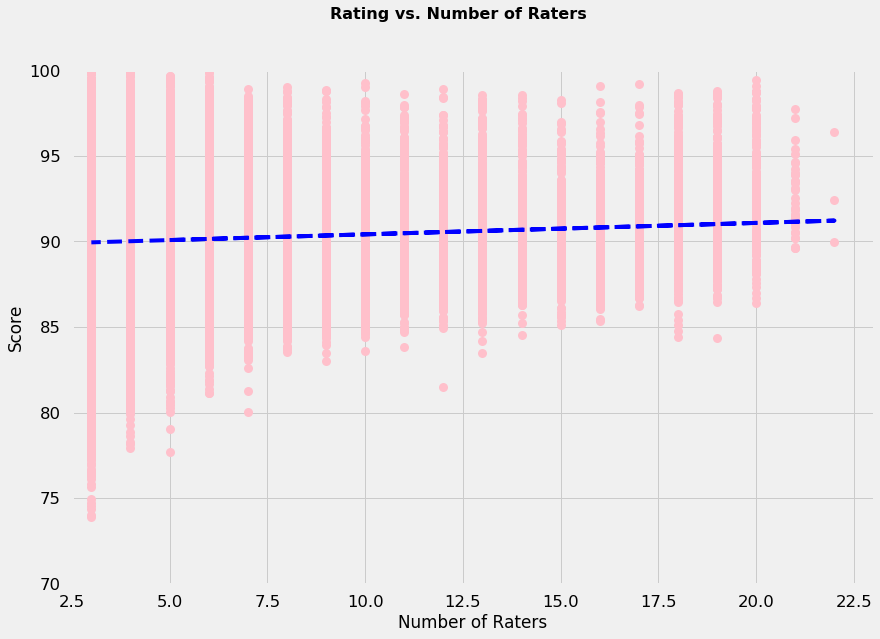

In [67]:
#Across all the regions, does the rating correlate with the count (scatter + regression)
#Plotting but the above matrix shows me that there is no correlation between the journalist count and score given, since it is equal to 0.
fig, ax = plt.subplots()

fig.suptitle("Rating vs. Number of Raters", fontsize=16, fontweight="bold")

ax.set_xlim(2.5, 23)
ax.set_ylim(70, 100)

ax.set_xlabel("Number of Raters")
ax.set_ylabel("Score")


ax.plot(journalist_count, score, linewidth=0, marker='o')
ax.plot(journalist_count, fit, 'b--')
plt.savefig("scatterplotratervsscore.png")
plt.show()

In [58]:
#find average score/ average journalist count of red, white, and pink wines to see "statistically better"
mean_score_count= score_count.groupby("color").mean()
mean_score_count

,journalist_count,score
color,,
1,5.778391,90.041722
2,5.500768,90.611404
3,4.464286,91.213482


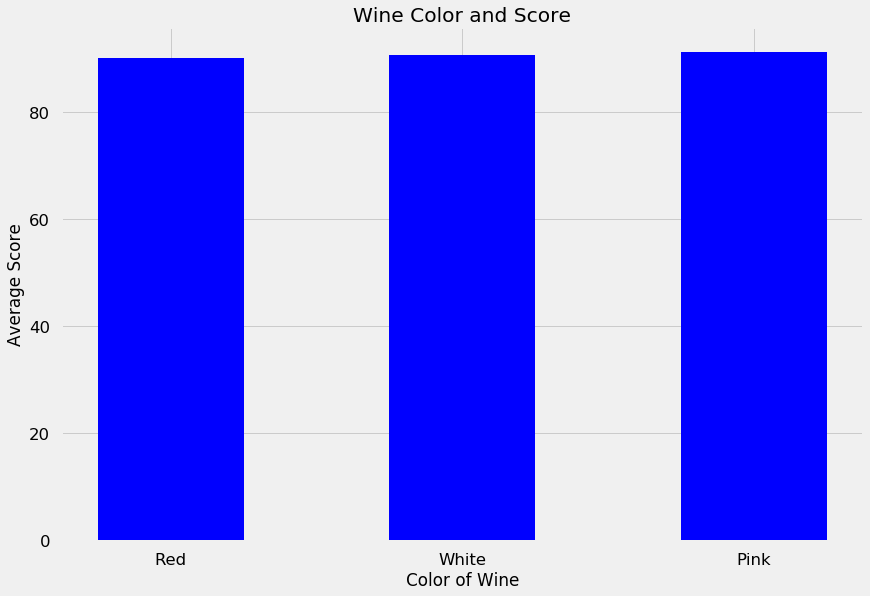

In [68]:
#rename colors back to strings
#bar chart variable
w= .5
color_wine = ["Red", "White", "Pink"]
score_wine= [90.04, 90.61, 91.21]
numjourn= [5.78, 5.5, 4.46]
#bar chart wine color/score
by_color= plt.bar(color_wine, score_wine, width= w, color="b", align="center")
plt.title("Wine Color and Score")
plt.xlabel("Color of Wine")
plt.ylabel("Average Score")
plt.savefig("fig3.png")
# Make some labels.

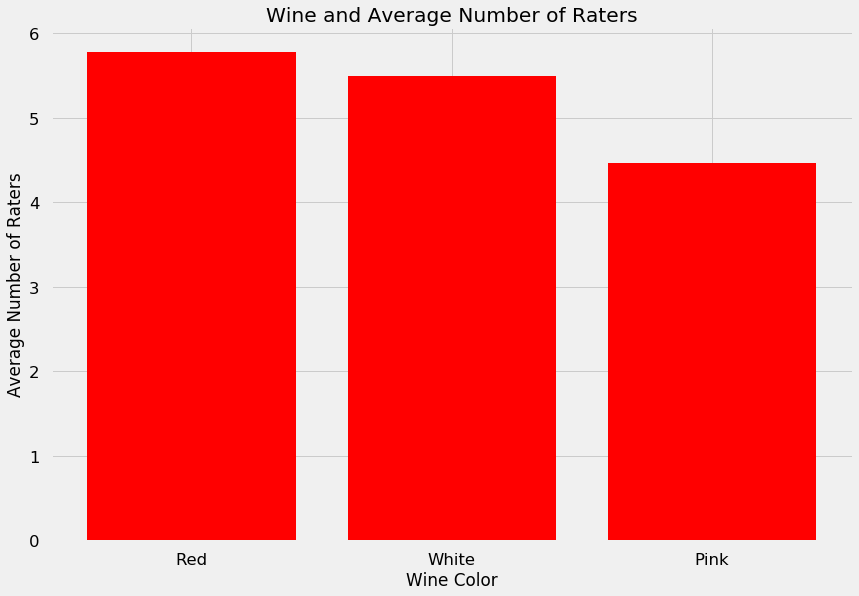

In [69]:
#show the average number of judges for each color of wine
by_njourn= plt.bar(color_wine, numjourn, color="r", align="center")
plt.title("Wine and Average Number of Raters")
plt.xlabel("Wine Color")
plt.ylabel("Average Number of Raters")
plt.savefig("fig4.png")

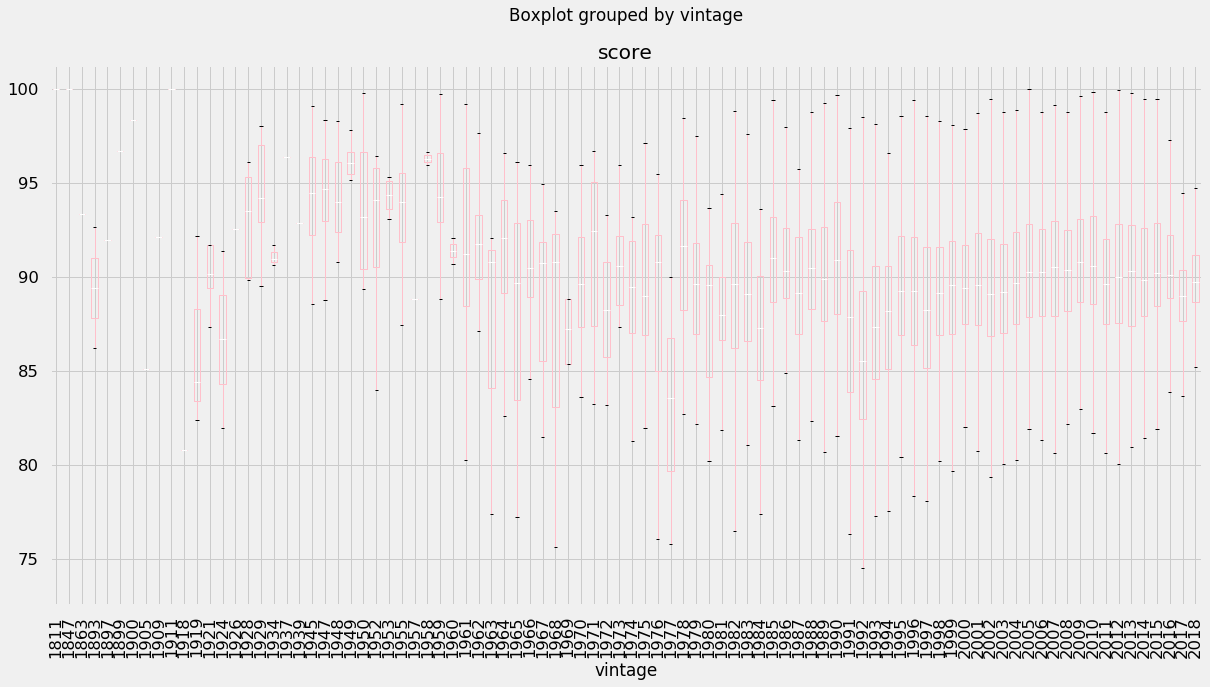

In [71]:
# Create a boxplot to compare means
df.boxplot("score", by="vintage", figsize=(20, 10))
plt.xticks(rotation = 90);

In [73]:
vintages = df.vintage.unique()
print(vintages)

[2015 2016 2017 1970 2018 2010 2013 2005 1995 1996 1998 2003 2004 2002
 2007 1994 1999 1997 1962 1990 1978 1971 1961 2000 2008 2011 2012 1985
 2014 1969 1988 2009 2001 1982 1983 1989 1964 1967 2006 1948 1968 1966
 1984 1986 1993 1928 1926 1953 1945 1975 1979 1919 1918 1965 1947 1959
 1929 1981 1987 1949 1955 1952 1992 1976 1991 1980 1934 1905 1973 1974
 1924 1957 1950 1977 1921 1937 1893 1958 1900 1939 1911 1960 1972 1963
 1863 1897 1909 1899 1811 1847]


In [75]:
groups = []
for vintage in vintages:
    tempgroup = df[df["vintage"] == vintage]["score"]
    groups.append(tempgroup)

In [77]:
anova = stats.f_oneway(*[list(df[df['vintage']==vintage].score) for vintage in vintages])
#stats.f_oneway(groups.values())
print(anova)

F_onewayResult(statistic=20.83320966179601, pvalue=2.6224155e-317)


In [78]:
means = []
x = groups[1].mean()

for group in groups:
    x = group.mean()
    means.append(x)
print(means)

[90.80524043179585, 90.74152158010244, 89.25618863049098, 89.47606060606063, 90.14962660443396, 91.05745888594153, 90.2521875000001, 90.47261771747803, 89.52025761124125, 89.16178846153845, 89.0599836867863, 89.38882658359313, 89.88193897637781, 89.43894278606975, 90.62903565640194, 87.85804347826085, 89.45844137931032, 88.27282809611827, 91.85799999999999, 90.99381132075472, 91.29538461538462, 91.35695652173914, 91.5590909090909, 89.66004889975547, 90.433897928994, 89.70809890109874, 90.20684111268264, 90.98305263157893, 90.30028690662499, 86.19200000000001, 90.29887096774196, 91.02028405797097, 89.83753031973534, 89.50551181102365, 89.39814814814815, 90.05241706161142, 91.64649999999999, 88.84909090909092, 90.32335227272722, 94.36333333333334, 87.072, 90.76208333333334, 87.07105263157894, 90.61936708860758, 87.5687142857143, 91.0425, 92.56, 94.57285714285715, 94.24000000000001, 89.54243902439023, 89.55379310344827, 86.33333333333333, 80.79, 87.68666666666667, 94.36692307692307, 94.42

In [79]:
s = pd.Series(means, index =vintages)
s = s.sort_values(ascending=False)
print(s)

1911    100.000000
1811    100.000000
1847     99.990000
1900     98.340000
1899     96.720000
1937     96.390000
1958     96.305000
1949     95.213636
1953     94.572857
1959     94.420476
1929     94.416667
1947     94.366923
1948     94.363333
1945     94.240000
1950     93.912500
1955     93.555455
1863     93.370000
1939     92.860000
1926     92.560000
1952     92.395000
1909     92.120000
1897     91.970000
1962     91.858000
1964     91.646500
1961     91.559091
1960     91.405000
1971     91.356957
1978     91.295385
1934     91.110000
2010     91.057459
           ...    
2002     89.438943
1893     89.430000
1983     89.398148
2003     89.388827
1987     89.271750
2017     89.256189
1996     89.161788
1998     89.059984
1976     88.880000
1967     88.849091
1974     88.832857
1957     88.830000
1981     88.515385
1997     88.272828
1972     88.260000
1980     88.055000
1994     87.858043
1991     87.733282
1965     87.686667
1993     87.568714
1968     87.072000
1984     87.